<a href="https://colab.research.google.com/github/yuvi31102000/Loan_default/blob/main/Loan_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
cur_app = pd.read_csv("/content/drive/MyDrive/application_data.csv")

In [ ]:
cur_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
pre_app = pd.read_csv("/content/drive/MyDrive/previous_application.csv")
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(f'Current application size: {cur_app.shape}')
print(f'Previous application size: {pre_app.shape}')

Current application size: (307511, 122)
Previous application size: (1670214, 37)


In [ ]:
df_cur_app = cur_app.copy()
df_pre_app = pre_app.copy()

In [ ]:
df_cur_app.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [ ]:
df_cur_app_nulls = pd.DataFrame(df_cur_app.isnull().sum().sort_values(ascending=False))

In [ ]:
df_cur_app_nulls.reset_index(inplace=True)

In [ ]:
df_cur_app_nulls.rename(columns={'index': 'column_name', 0: 'null_count'}, inplace=True)

In [ ]:
df_cur_app_nulls.to_excel('cur_app_nulls.xlsx', index=False)

In [ ]:
pd.read_excel('cur_app_nulls.xlsx')

,column_name,null_count
0,COMMONAREA_AVG,214865
1,COMMONAREA_MODE,214865
2,COMMONAREA_MEDI,214865
3,NONLIVINGAPARTMENTS_MEDI,213514
4,NONLIVINGAPARTMENTS_MODE,213514
5,NONLIVINGAPARTMENTS_AVG,213514
6,FONDKAPREMONT_MODE,210295
7,LIVINGAPARTMENTS_AVG,210199
8,LIVINGAPARTMENTS_MEDI,210199
9,LIVINGAPARTMENTS_MODE,210199


In [ ]:
df_cur_app_nulls['percentage'] = round(df_cur_app_nulls['null_count'] / df_cur_app.shape[0] * 100, 2)

In [ ]:
df_cur_app_nulls.to_excel('cur_app_nulls.xlsx', index=False)

In [ ]:
df_cur_app_nulls[df_cur_app_nulls['percentage'] > 40][['column_name', 'percentage']]

,column_name,percentage
0,COMMONAREA_AVG,69.87
1,COMMONAREA_MODE,69.87
2,COMMONAREA_MEDI,69.87
3,NONLIVINGAPARTMENTS_MEDI,69.43
4,NONLIVINGAPARTMENTS_MODE,69.43
5,NONLIVINGAPARTMENTS_AVG,69.43
6,FONDKAPREMONT_MODE,68.39
7,LIVINGAPARTMENTS_AVG,68.35
8,LIVINGAPARTMENTS_MEDI,68.35
9,LIVINGAPARTMENTS_MODE,68.35


In [ ]:
df_col_info = pd.read_csv('/content/drive/MyDrive/columns_description.csv')

In [ ]:
cur_app_null_info = pd.merge(left=df_cur_app_nulls, right=df_col_info, how='inner', left_on='column_name', right_on='Row')[['column_name', 'percentage', 'Description']]

In [ ]:
cur_app_null_info.to_excel('cur_app_null_info.xlsx', index=False)

In [ ]:
cur_app_null_info[cur_app_null_info['percentage'] > 40]

,column_name,percentage,Description
0,COMMONAREA_AVG,69.87,Normalized information about building where th...
1,COMMONAREA_MODE,69.87,Normalized information about building where th...
2,COMMONAREA_MEDI,69.87,Normalized information about building where th...
3,NONLIVINGAPARTMENTS_MEDI,69.43,Normalized information about building where th...
4,NONLIVINGAPARTMENTS_MODE,69.43,Normalized information about building where th...
5,NONLIVINGAPARTMENTS_AVG,69.43,Normalized information about building where th...
6,FONDKAPREMONT_MODE,68.39,Normalized information about building where th...
7,LIVINGAPARTMENTS_AVG,68.35,Normalized information about building where th...
8,LIVINGAPARTMENTS_MEDI,68.35,Normalized information about building where th...
9,LIVINGAPARTMENTS_MODE,68.35,Normalized information about building where th...


In [ ]:
df_cur_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
missing_value_percentage = df_cur_app.isnull().sum().sort_values(ascending=False)/df_cur_app.shape[0]*100

In [ ]:
col_to_drop = missing_value_percentage[missing_value_percentage > 40].index.to_list()

In [ ]:
df_cur_app.drop(columns=col_to_drop, inplace=True)

In [ ]:
df_cur_app.shape

(307511, 73)

 After dropping columns with more than 40% missing values, 49 columns were removed, leaving us with 73 columns in the dataset.

## Impute missing values for the remaining columns

### Separate numeric and categorical columns

In [ ]:
num_cols = df_cur_app.select_dtypes(include=[np.number]).columns.to_list()
cat_cols = df_cur_app.select_dtypes(include=['object']).columns.to_list()

For most financial datasets (like loan applications), numeric columns such as income, loan amount, or age are often skewed due to a few very large or small values. In these cases, using the median is generally preferred because it is less affected by outliers.

Let’s visualize the distribution of a few key numeric columns (e.g., AMT_INCOME_TOTAL, AMT_CREDIT, and EXT_SOURCE_3) to see if the median is appropriate, or if another method might be better.

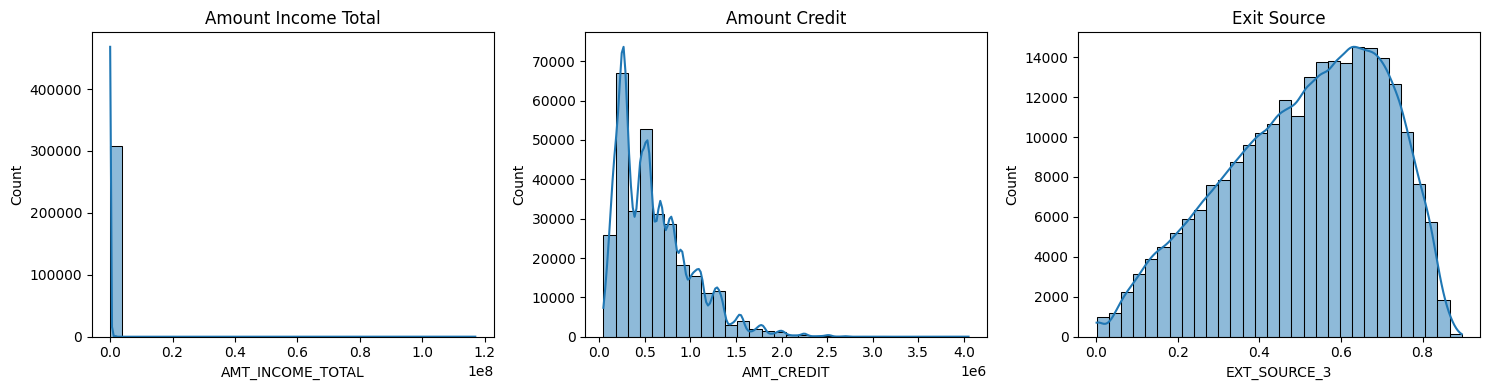

In [ ]:
key_numeric_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'EXT_SOURCE_3']
title = ['Amount Income Total', 'Amount Credit', 'Exit Source']

plt.figure(figsize=(15, 4))
for col, title in zip(key_numeric_cols, title):
    plt.subplot(1,3,key_numeric_cols.index(col) + 1)
    sns.histplot(data=df_cur_app[col], kde=True, bins=30)
    plt.title(title)
plt.tight_layout()
plt.show()

AMT_INCOME_TOTAL and AMT_CREDIT both show strong right skew (a long tail to the right), which is typical for financial data due to a few applicants with very high incomes or credit amounts.EXT_SOURCE_3, which is likely a normalized score, appears to have a more uniform or slightly skewed distribution.Because of the skewness in AMT_INCOME_TOTAL and AMT_CREDIT, using the median to fill missing values is appropriate—it prevents the imputed values from being distorted by extreme outliers. For columns like EXT_SOURCE_3, the median or mean could both be reasonable, but the median remains a safe, robust choice.

### Impute numeric columns with median

In [ ]:
for col in num_cols:
  if df_cur_app[col].isnull().sum() > 0:
    df_cur_app[col].fillna(df_cur_app[col].median(), inplace=True)


<ipython-input-29-fd747a344a32>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cur_app[col].fillna(df_cur_app[col].median(), inplace=True)


###Impute categorical columns with mode

In [ ]:
for col in cat_cols:
  if df_cur_app[col].isnull().sum() > 0:
    df_cur_app[col].fillna(df_cur_app[col].mode()[0], inplace=True)

<ipython-input-30-d2376cc8f28c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cur_app[col].fillna(df_cur_app[col].mode()[0], inplace=True)


### Verify no missing values remain

In [ ]:
print(f'Remaining missing values: {df_cur_app.isnull().sum().sum()}')

Remaining missing values: 0


In [ ]:
df_cur_app.shape

(307511, 73)

In [ ]:
df_cur_app.to_csv('/content/drive/MyDrive/cur_app_cleaned.csv', index=False)

In [ ]:
df_cleaned_data = pd.read_csv('/content/drive/MyDrive/cur_app_cleaned.csv')

In [ ]:
df_cleaned_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Consistency Checks

### Check for inconsistent or unexpected values in categorical columns (e.g., typos, mixed case, or unexpected categories).

In [ ]:
cat_col_list = df_cleaned_data.select_dtypes(include=['object']).columns.to_list()

In [ ]:
for col in cat_col_list:
  print(f'{col}: {df_cleaned_data[col].unique()}')
  print('\n')

NAME_CONTRACT_TYPE: ['Cash loans' 'Revolving loans']


CODE_GENDER: ['M' 'F' 'XNA']


FLAG_OWN_CAR: ['N' 'Y']


FLAG_OWN_REALTY: ['Y' 'N']


NAME_TYPE_SUITE: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']


NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']


NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


NAME_FAMILY_STATUS: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']


NAME_HOUSING_TYPE: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


OCCUPATION_TYPE: ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barmen staff'


In [ ]:
# 1. Summarize and investigate special categories in key columns
# We'll look at the distribution and some basic stats for rows with 'XNA' or 'Unknown' in these columns

def summarize_special_category(df, col, special_value):
    subset = df[df[col] == special_value]
    count = subset.shape[0]
    percent = 100 * count / df.shape[0]
    summary = subset.describe(include='all')
    return count, percent, summary

# CODE_GENDER: 'XNA'
gender_xna_count, gender_xna_percent, gender_xna_summary = summarize_special_category(df_cleaned_data, 'CODE_GENDER', 'XNA')

# NAME_FAMILY_STATUS: 'Unknown'
family_unknown_count, family_unknown_percent, family_unknown_summary = summarize_special_category(df_cleaned_data, 'NAME_FAMILY_STATUS', 'Unknown')

# ORGANIZATION_TYPE: 'XNA'
org_xna_count, org_xna_percent, org_xna_summary = summarize_special_category(df_cleaned_data, 'ORGANIZATION_TYPE', 'XNA')

print('CODE_GENDER = XNA: count =', gender_xna_count, ', percent =', round(gender_xna_percent, 4))
print('NAME_FAMILY_STATUS = Unknown: count =', family_unknown_count, ', percent =', round(family_unknown_percent, 4))
print('ORGANIZATION_TYPE = XNA: count =', org_xna_count, ', percent =', round(org_xna_percent, 4))

CODE_GENDER = XNA: count = 4 , percent = 0.0013
NAME_FAMILY_STATUS = Unknown: count = 2 , percent = 0.0007
ORGANIZATION_TYPE = XNA: count = 55374 , percent = 18.0072


Here’s what we’ve found so far as we investigate the special/ambiguous values in your categorical columns:

For CODE_GENDER, only 4 records are 'XNA' (0.0013% of data), and for NAME_FAMILY_STATUS, only 2 are 'Unknown' (0.0007%). For ORGANIZATION_TYPE, 'XNA' is much more common, making up 18% of the data (55,374 records).

### Investigate patterns in these special categories and look at default rates for each special category

In [ ]:
def analyze_target_distribution(df, column, special_value):
    # Get target distribution for special value
    special_target = df[df[column] == special_value]['TARGET'].value_counts(normalize=True)
    # Get target distribution for other values
    other_target = df[df[column] != special_value]['TARGET'].value_counts(normalize=True)
    return round(special_target * 100, 2), round(other_target * 100, 2)


# Analyze default rates
print("Default Rate Analysis:")
print('\n')
print("\
CODE_GENDER = XNA vs Others:")
xna_gender_target, other_gender_target = analyze_target_distribution(df_cleaned_data, 'CODE_GENDER', 'XNA')
print("XNA default rate:", xna_gender_target.get(1, 0))
print("Others default rate:", other_gender_target.get(1, 0))
print('\n')
print("\
NAME_FAMILY_STATUS = Unknown vs Others:")
unknown_family_target, other_family_target = analyze_target_distribution(df_cleaned_data, 'NAME_FAMILY_STATUS', 'Unknown')
print("Unknown default rate:", unknown_family_target.get(1, 0))
print("Others default rate:", other_family_target.get(1, 0))
print('\n')
print("\
ORGANIZATION_TYPE = XNA vs Others:")
xna_org_target, other_org_target = analyze_target_distribution(df_cleaned_data, 'ORGANIZATION_TYPE', 'XNA')
print("XNA default rate:", xna_org_target.get(1, 0))
print("Others default rate:", other_org_target.get(1, 0))

Default Rate Analysis:


CODE_GENDER = XNA vs Others:
XNA default rate: 0
Others default rate: 8.07


NAME_FAMILY_STATUS = Unknown vs Others:
Unknown default rate: 0
Others default rate: 8.07


ORGANIZATION_TYPE = XNA vs Others:
XNA default rate: 5.4
Others default rate: 8.66


We then checked if these special categories are associated with different default rates (i.e., the proportion of loans that defaulted):

CODE_GENDER = XNA: Default rate is 0 (none defaulted), while others have a default rate of about 8%.

NAME_FAMILY_STATUS = Unknown: Default rate is 0, others about 8%.
ORGANIZATION_TYPE = XNA: Default rate is about 5.4%, while others are about 8.7%.

This suggests that the 'XNA' and 'Unknown' values are not random—they may be associated with lower risk, or perhaps with missingness that is informative.

### Let's look at some key financial metrics for ORGANIZATION_TYPE = 'XNA' since it's the largest special category

In [ ]:
# Select key financial columns
financial_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

# Compare distributions
xna_stats = df_cleaned_data[df_cleaned_data['ORGANIZATION_TYPE'] == 'XNA'][financial_cols].describe()
other_stats = df_cleaned_data[df_cleaned_data['ORGANIZATION_TYPE'] != 'XNA'][financial_cols].describe()

print("Financial metrics for ORGANIZATION_TYPE = 'XNA':")
print(xna_stats)
print('\n')
print("\
Financial metrics for other ORGANIZATION_TYPES:")
print(other_stats)

Financial metrics for ORGANIZATION_TYPE = 'XNA':
       AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY
count      5.537400e+04  5.537400e+04   55374.000000
mean       1.363956e+05  5.426899e+05   23904.303202
std        7.666086e+04  3.784991e+05   13308.379238
min        2.565000e+04  4.500000e+04    1615.500000
25%        9.000000e+04  2.547000e+05   14503.500000
50%        1.170000e+05  4.578345e+05   21775.500000
75%        1.665000e+05  7.551900e+05   29943.000000
max        2.250000e+06  3.312162e+06  225000.000000


Financial metrics for other ORGANIZATION_TYPES:
       AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY
count      2.521370e+05  2.521370e+05  252137.000000
mean       1.759141e+05  6.113985e+05   27812.186704
std        2.588516e+05  4.065272e+05   14647.424282
min        2.565000e+04  4.500000e+04    1980.000000
25%        1.125000e+05  2.779695e+05   17073.000000
50%        1.575000e+05  5.212800e+05   25834.500000
75%        2.115000e+05  8.292240e+05   35617.500000


Summary:


For rare categories like 'XNA' in CODE_GENDER and 'Unknown' in NAME_FAMILY_STATUS, it’s best to keep them as separate categories or mark as missing, rather than replacing with the mode.

For ORGANIZATION_TYPE = 'XNA', since it’s a large and distinct group, it should be kept as its own category. Its lower default rate and different financial profile may be important for modeling.


In [ ]:
df_cleaned_data = df_cleaned_data.copy()

In [ ]:
df_cleaned_data['CODE_GENDER'] = df_cleaned_data['CODE_GENDER'].replace('XNA', 'NOT_SPECIFIED')

In [ ]:
df_cleaned_data['NAME_FAMILY_STATUS'] = df_cleaned_data['NAME_FAMILY_STATUS'].replace('Unknown', 'UNKNOWN')


In [ ]:
df_cleaned_data['ORGANIZATION_TYPE'] = df_cleaned_data['ORGANIZATION_TYPE'].replace('XNA', 'NOT_SPECIFIED')


In [ ]:
df_cleaned_data.to_csv('/content/drive/MyDrive/df_app_data.csv', index=False)

### Check for Duplicate rows and duplicate Ids


In [ ]:
df_app_data = pd.read_csv('/content/drive/MyDrive/df_app_data.csv')

In [ ]:
df_app_data.shape

(307511, 73)

In [ ]:
df_app_data = df_app_data.copy()

In [ ]:
df_app_data['SK_ID_CURR'].duplicated().sum()

np.int64(0)

In [ ]:
df_app_data.duplicated().sum()

np.int64(0)

## Bivariate Analysis

In [ ]:
df_app_data.drop(columns=['FLAG_OWN_CAR', 'FLAG_OWN_REALTY'], inplace=True)

In [ ]:
df_app_data.shape

(307511, 45)

In [ ]:
flag_cols = []

for i in df_app_data.columns:d
  if i.startswith('FLAG_'):
    flag_cols.append(i)

flag_cols.append('TARGET')


In [ ]:
df_flag_col = df_app_data[flag_cols]
df_flag_col.head()

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,1,1,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_flag_col.shape

(307511, 27)

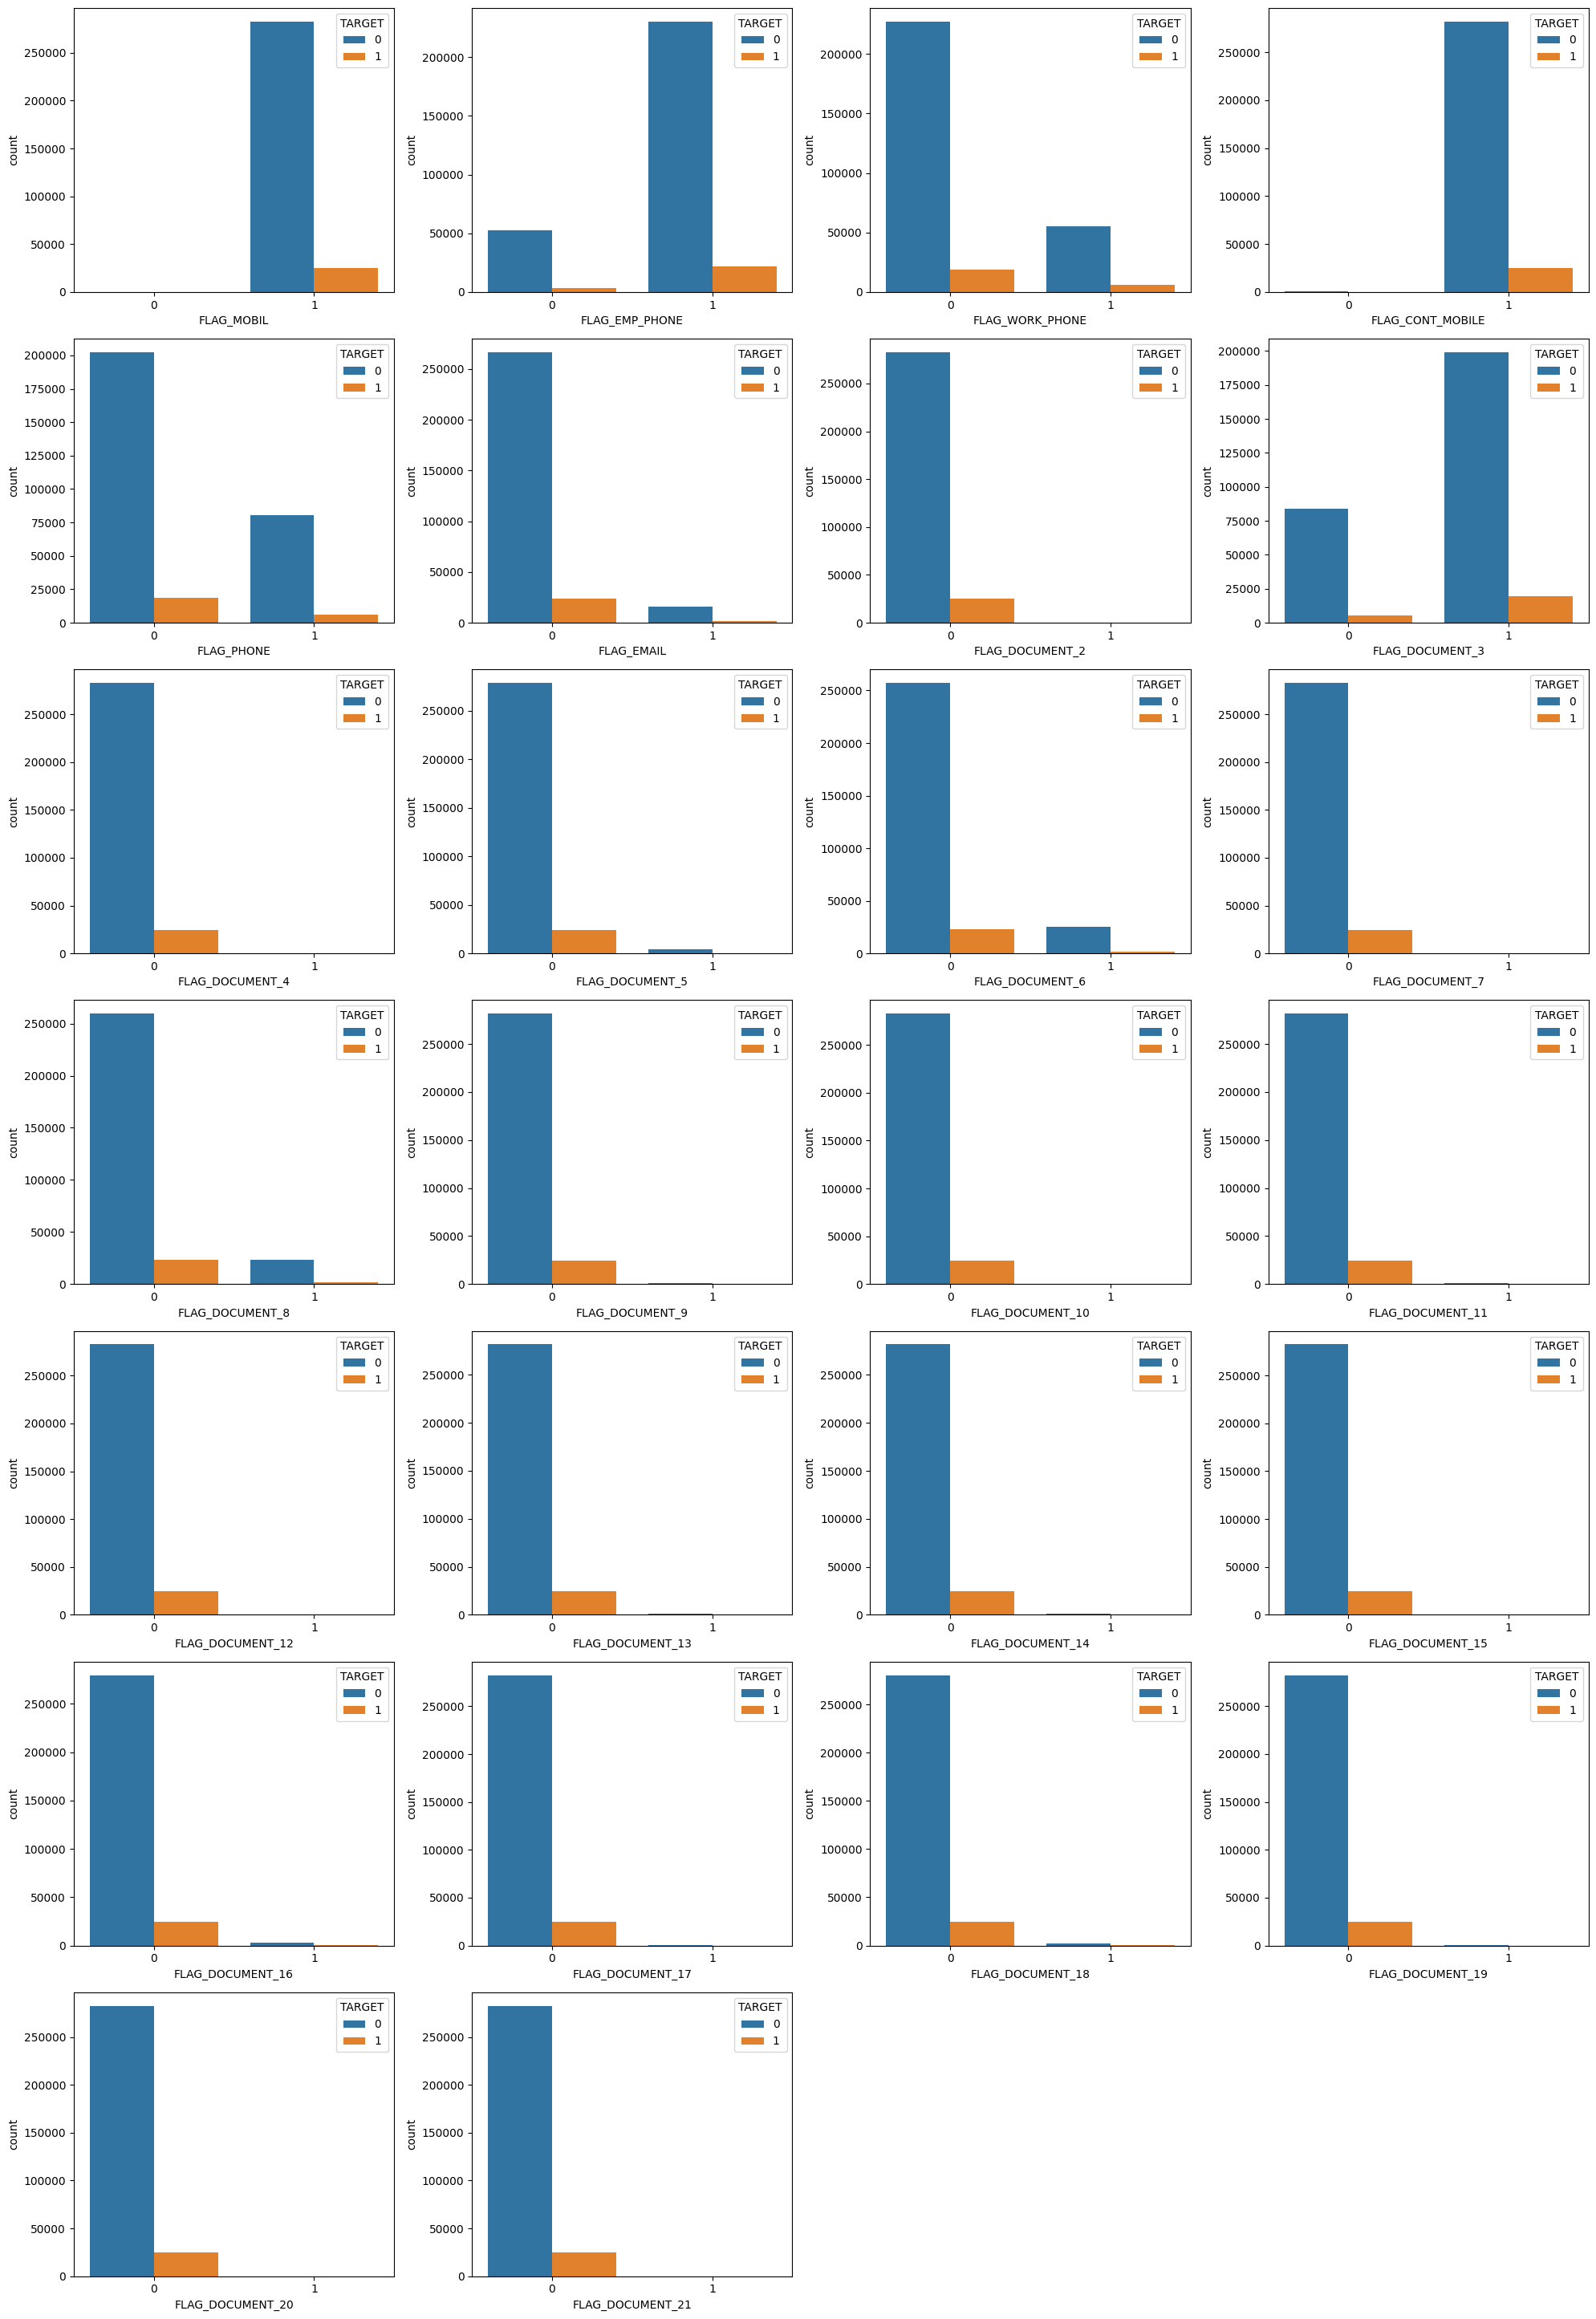

In [ ]:
plt.figure(figsize=(20,29))
for i, col in enumerate(flag_cols):
  if col != "TARGET":
    plt.subplot(7,4,i+1)
    sns.countplot(data=df_flag_col, x=col, hue='TARGET')
    plt.tight_layout()

<ipython-input-14-e06381174229>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flag_col.drop(columns=col, inplace=True)
<ipython-input-14-e06381174229>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flag_col.drop(columns=col, inplace=True)
<ipython-input-14-e06381174229>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flag_col.drop(columns=col, inplace=True)
<ipython-input-14-e06381174229>:3: SettingWithCopyWarning: 
A va

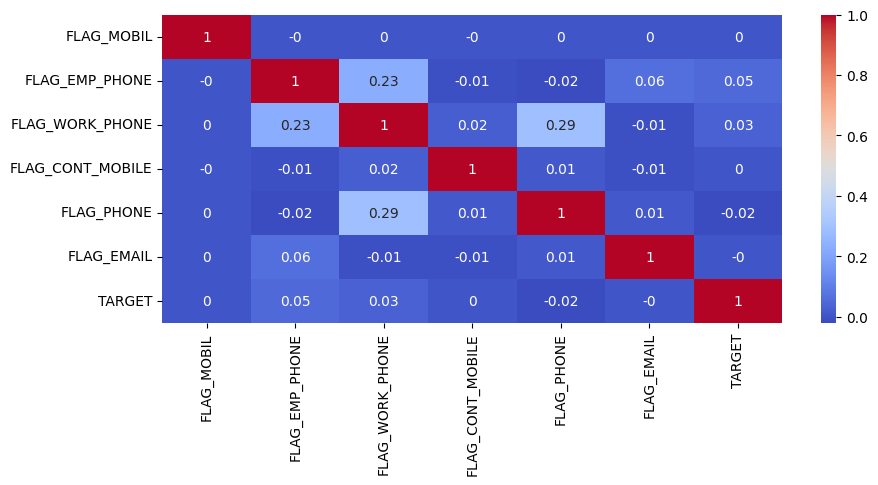

In [ ]:
for col in df_flag_col.columns:
  if col.startswith('FLAG_DOCUMENT_'):
    df_flag_col.drop(columns=col, inplace=True)

corr_matrix = df_flag_col.corr().round(2)

plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
flag_cols.remove('TARGET')

In [ ]:
df_app_cleaned = df_app_data.drop(columns=flag_cols, inplace=True)

In [ ]:
df_app_data.shape

(307511, 45)

In [ ]:
df_app_data.to_csv('/content/drive/MyDrive/df_app_data.csv', index=False)

NameError: name 'df_app_data' is not defined

In [4]:
df_app_data = pd.read_csv('/content/drive/MyDrive/df_app_data.csv')

In [5]:
df_app_data = df_app_data.copy()

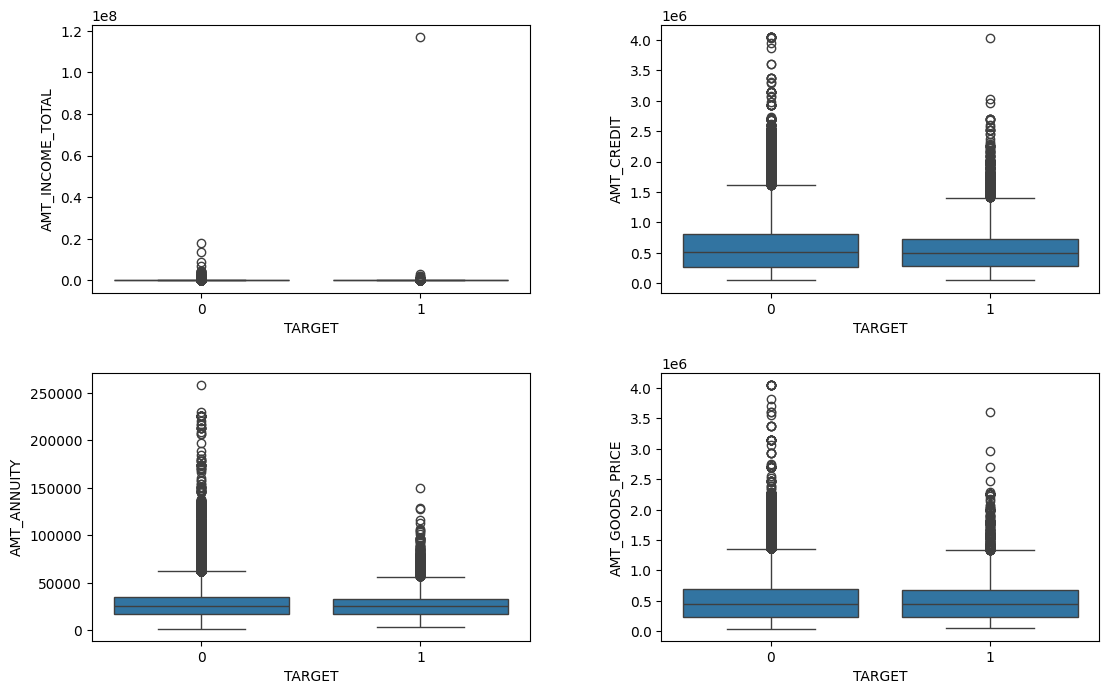

In [6]:
# Target variable analysis with key numerical features
amt_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

fig, axes = plt.subplots(2, 2, figsize=(13, 8))

for i, col in enumerate(amt_cols):
    sns.boxplot(x='TARGET', y=col, data=df_app_data, ax=axes[i // 2, i % 2])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [8]:
# Categorical variables vs Target
cat_cols = df_app_data.select_dtypes(include=['object']).columns
cat_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

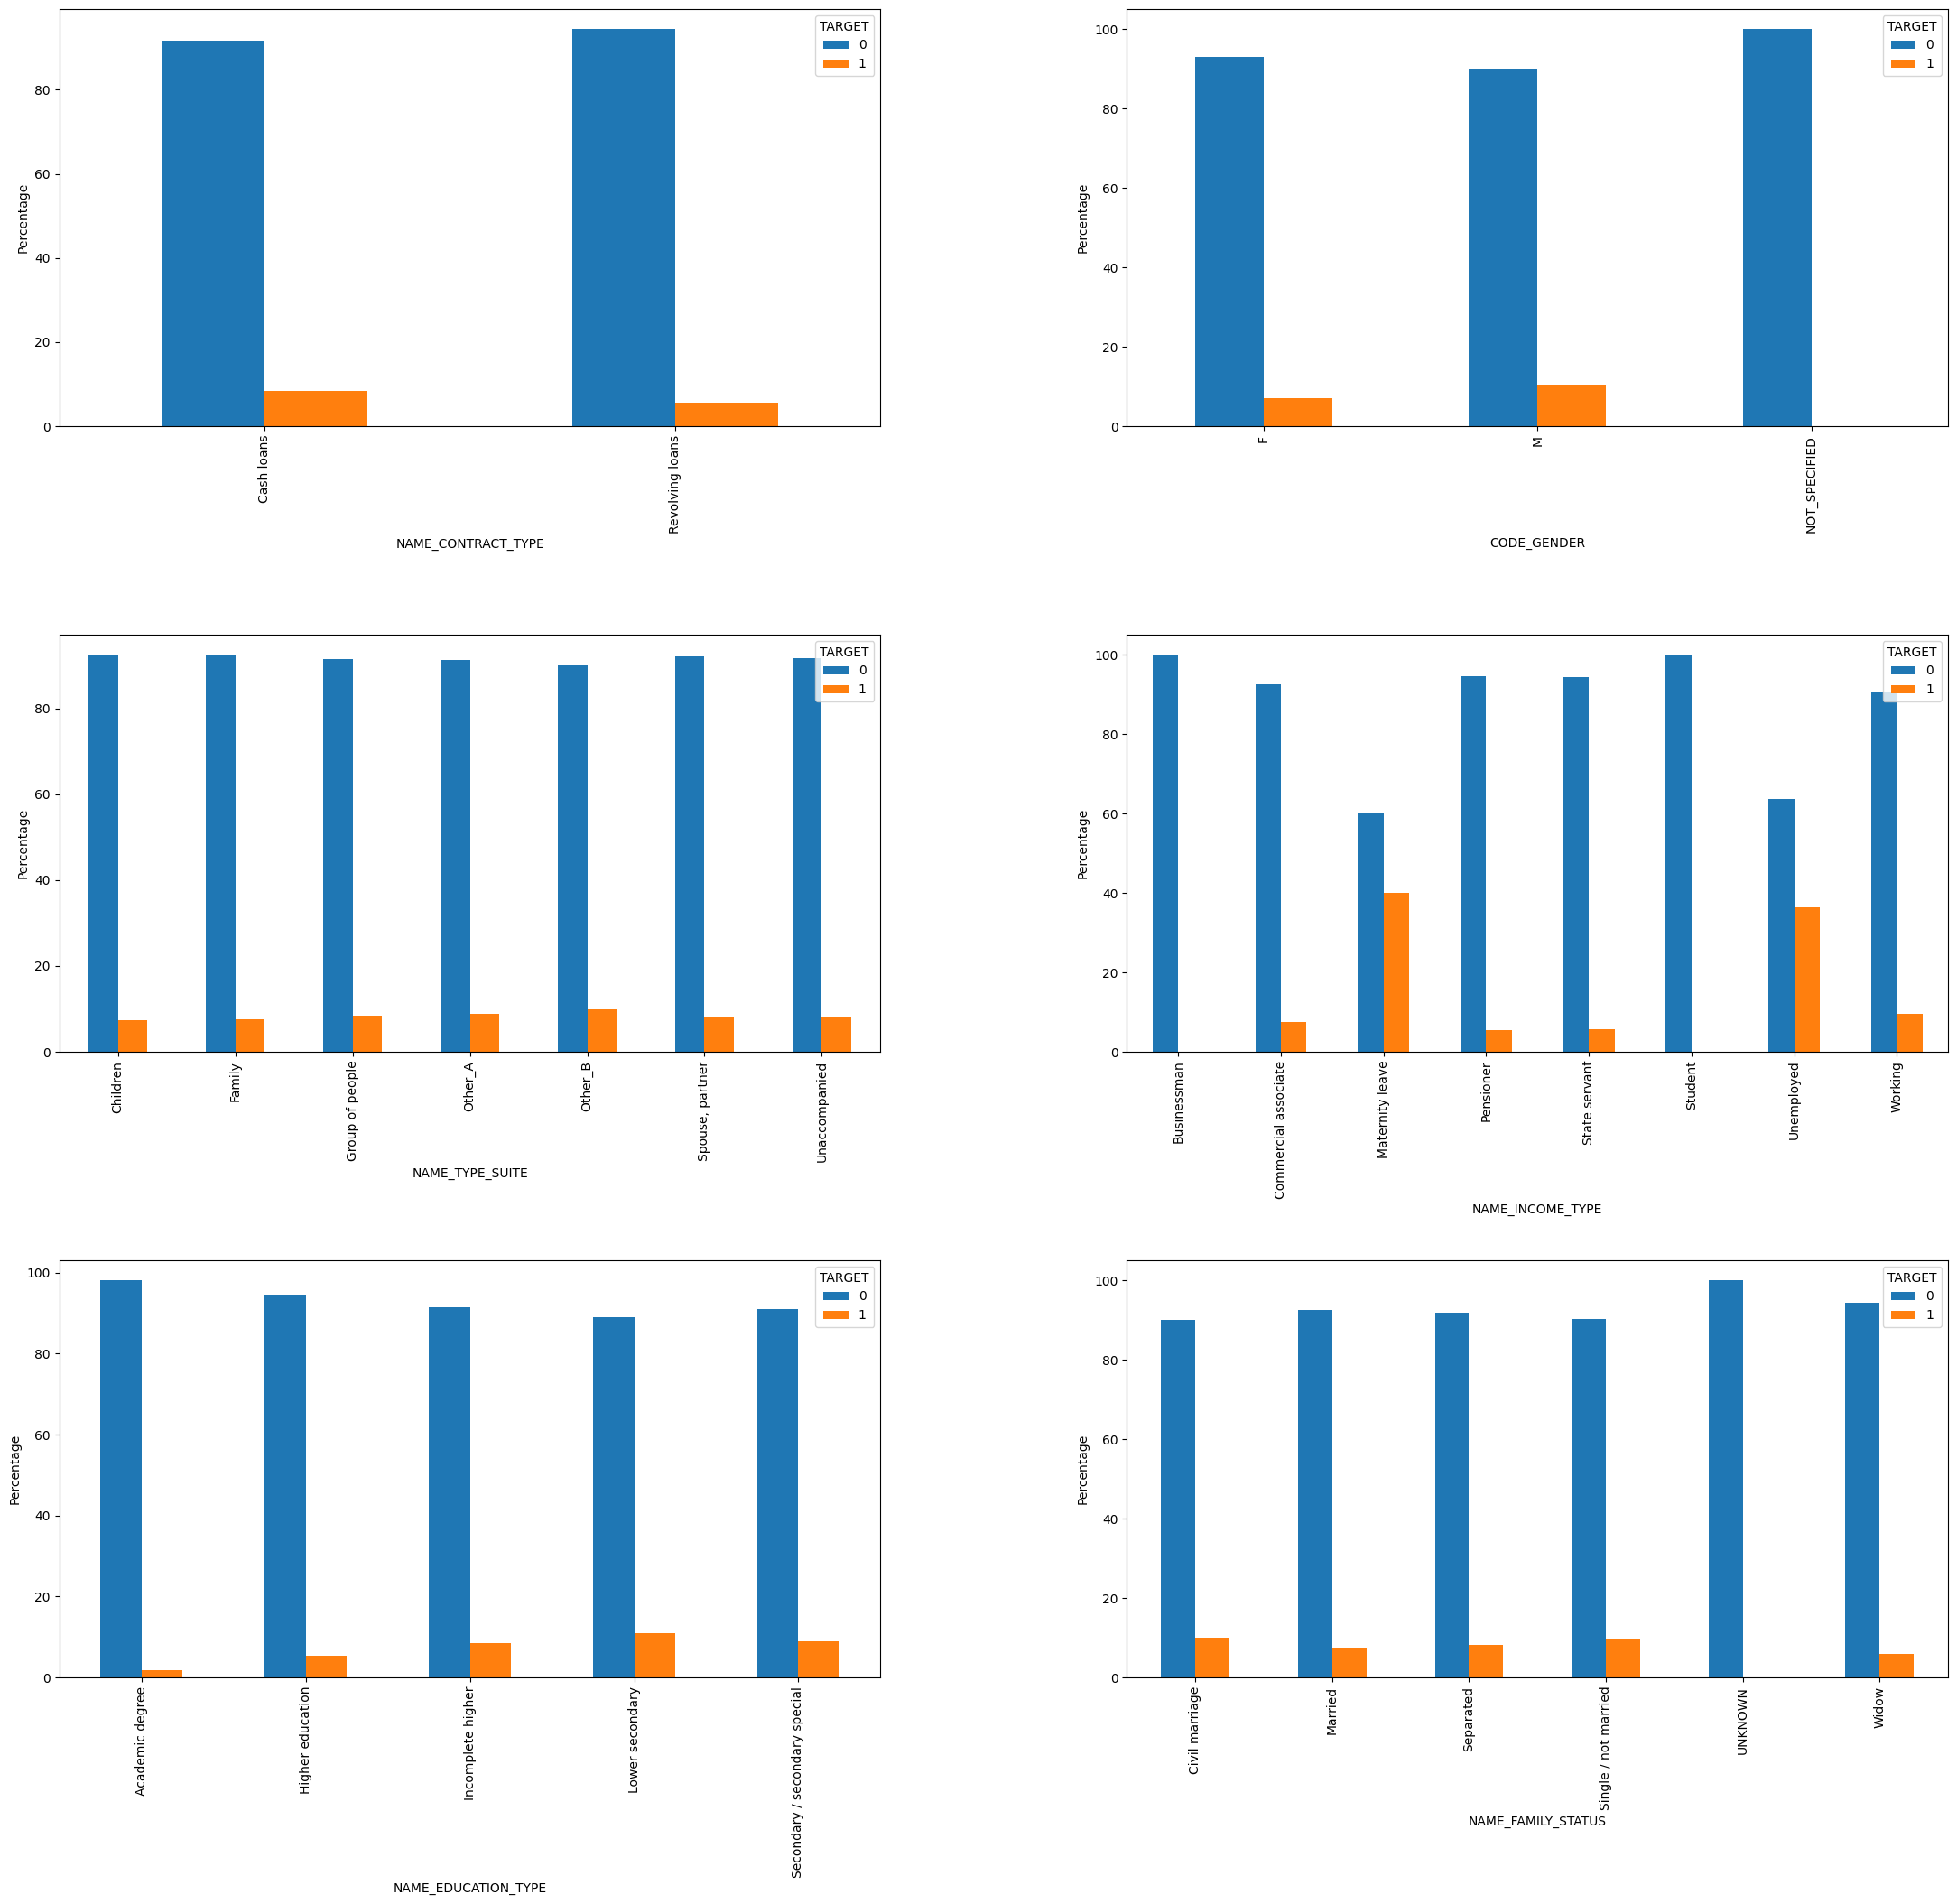

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(27, 24))

for i, col in enumerate(cat_cols[:6]):
    df_temp = pd.crosstab(df_app_data[col], df_app_data['TARGET'], normalize='index') * 100
    df_temp.plot(kind='bar', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_xlabel(col)
    axes[i // 2, i % 2].set_ylabel('Percentage')
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

**Key Insights**

Default Rate Variation Across Categories:

For variables such as income type, education type, and family status, the default rates varied noticeably. For example, some income types had default rates that were significantly higher (or lower) than others, suggesting differences in risk profiles across these categorical groups.

Distinct Patterns in Default Rates:

Certain categories, like "Maternity leave" or "Unemployed" (observed in our earlier analysis), showed markedly higher default rates compared to categories such as "Working" or "Student". This may imply that borrowers in those categories, due to factors like unstable income or limited access to credit, are more prone to default.

Clear Segmentation and Group Comparisons:

The bar plots comparing target rates across categories (for instance, the Default Rate by Income Type chart) provide a straightforward visualization of which customer segments are riskier. This helps in segmenting the dataset for further analysis or for building targeted risk models.

## Multivariate analysis


In [7]:
demographic_features = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'TARGET']

financial_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'TARGET']

region_city_features = ['REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                         'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'TARGET']

app_time_features = ['HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE', 'TARGET']

externl_risk_features = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']

social_circle_features = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','TARGET']

credit_bureau_features = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'TARGET']


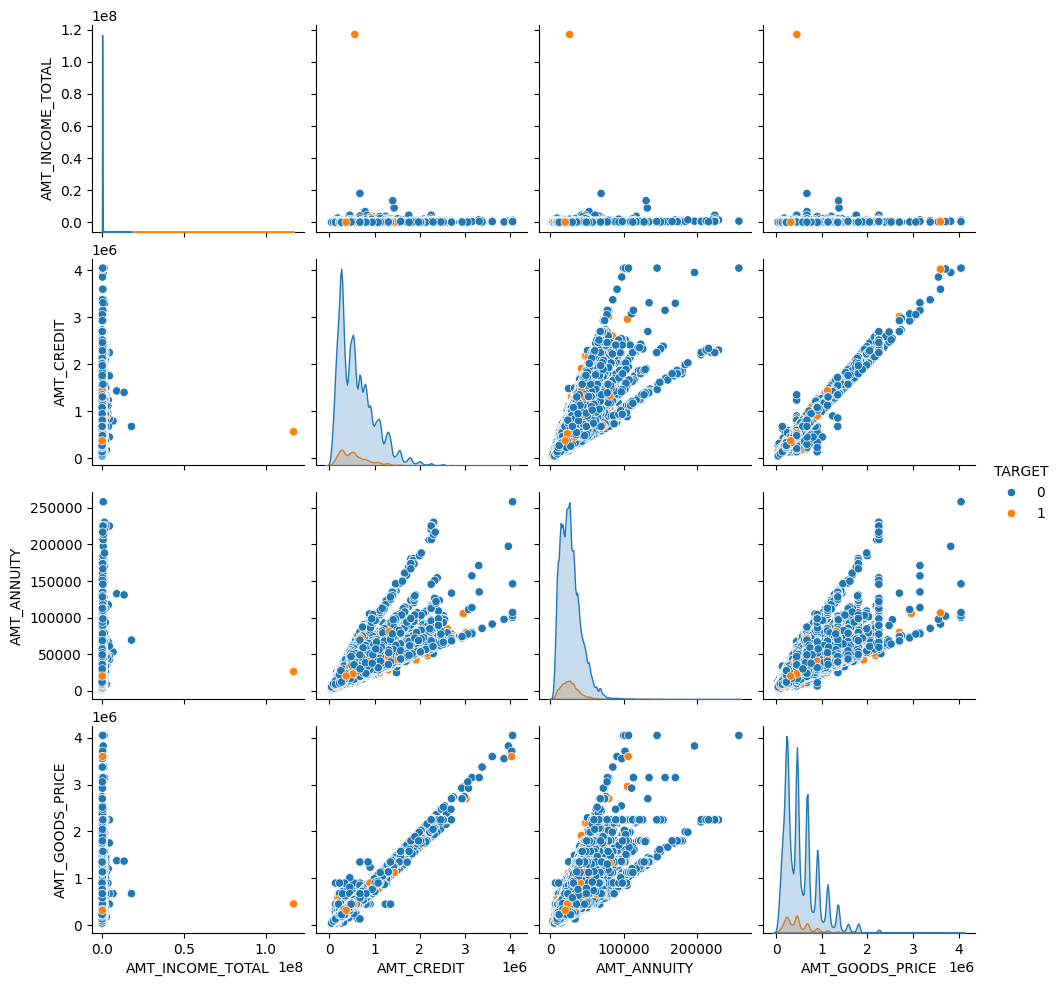

In [9]:
sns.pairplot(data=df_app_data[financial_features], hue='TARGET')
plt.show()

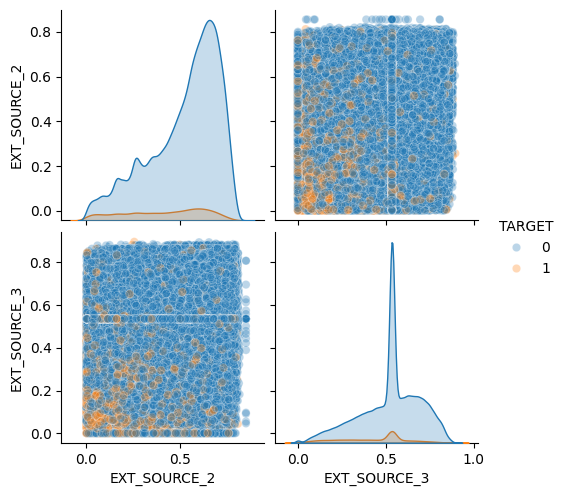

In [14]:
sns.pairplot(data=df_app_data[externl_risk_features], hue='TARGET', plot_kws={'alpha': 0.3})
plt.show()

## Outlier Analysis

In [ ]:
df_app_data = pd.read_csv('/content/drive/MyDrive/df_app_data.csv')

In [ ]:
df_app_data = df_app_data.copy()

In [ ]:
num_cols = df_app_data.select_dtypes(include=[np.number]).columns
num_cols.to_list()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [ ]:
cat_cols = df_app_data.select_dtypes(include=['object']).columns
cat_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

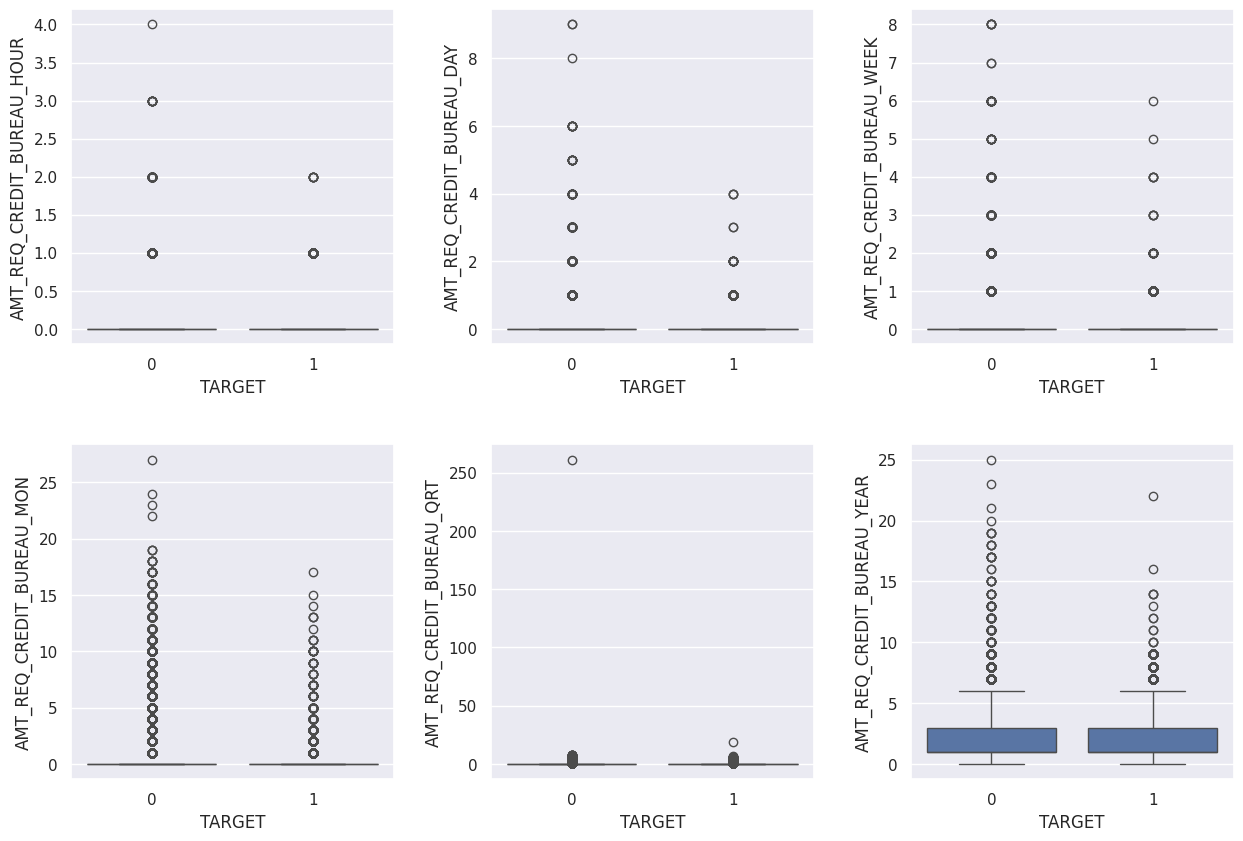

In [ ]:
amt_req_cols = [col for col in num_cols if col.startswith('AMT_REQ_')]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, col in enumerate(amt_req_cols):
    sns.boxplot(data=df_app_data, y=col, x='TARGET', ax=axes[i // 3, i % 3])
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()